In [1]:
#imporing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import json

def save_data(title,data):
    with open(title, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=2)
        
        
def load_data(title):
    with open(title, encoding='utf-8') as f:
        return json.load(f)

In [41]:
car_data = load_data('turbo_az.json')

car_data = pd.DataFrame(car_data)

cars = load_data('cars.json')

carsd = pd.DataFrame(cars)

data = pd.concat([car_data, carsd])

data.duplicated().sum()

data = data.drop_duplicates()

data.reset_index(drop=True, inplace=True)

In [42]:
#Data cleaning
data['Buraxılış ili'] = pd.to_numeric(data['Buraxılış ili'])

data['Mühərrik'] = data['Mühərrik'].str[:-1].str.strip().astype(float)

data['Mühərrikin gücü'] = data['Mühərrikin gücü'].str[:-4].str.strip().astype(float)

data['Yürüş'] = data['Yürüş'].str[:-2].str.strip().str.replace(' ','').astype(float)

data['Qiymət'] = data['Qiymət'].str.replace(' ','').astype(str)
x = data[data['Qiymət'].str.contains('AZN')==False]['Qiymət'].str[:-1].astype(int)*1.70
y = data[data['Qiymət'].str.contains('AZN')]['Qiymət'].str[:-3].astype(int)
data['Price'] = pd.concat([x,y])
data.drop('Qiymət', axis=1, inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Şəhər            1750 non-null   object 
 1   Marka            1750 non-null   object 
 2   Model            1750 non-null   object 
 3   Buraxılış ili    1750 non-null   int64  
 4   Ban növü         1750 non-null   object 
 5   Rəng             1750 non-null   object 
 6   Mühərrik         1750 non-null   float64
 7   Mühərrikin gücü  1750 non-null   float64
 8   Yanacaq növü     1750 non-null   object 
 9   Yürüş            1750 non-null   float64
 10  Sürətlər qutusu  1750 non-null   object 
 11  Ötürücü          1750 non-null   object 
 12  Yeni             1750 non-null   object 
 13  Price            1750 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 129.9+ KB


In [44]:
categorical = ['Ban növü','Ötürücü','Sürətlər qutusu','Yanacaq növü','Yeni']
numerical = ['Buraxılış ili','Mühərrikin gücü', 'Mühərrik', 'Yürüş']

In [45]:
#Removing outliers

In [46]:
for i in categorical:
    x = data[i].value_counts().to_frame()
    display(x)

,Ban növü
Sedan,853
Offroader / SUV,468
Hetçbek / Liftbek,217
Universal,66
Furqon,33
Yük maşını,27
Minivan,21
Pikap,17
Kupe,16
Motosiklet,10


,Ötürücü
Ön,842
Tam,469
Arxa,439


,Sürətlər qutusu
Avtomat,1327
Mexaniki,406
Variator,10
Robotlaşdırılmış,7


,Yanacaq növü
Benzin,1393
Dizel,286
Hibrid,65
Elektro,4
Qaz,2


,Yeni
Xeyr,1597
Bəli,153


In [47]:
droped = list(data['Ban növü'].value_counts().index[4:])

In [48]:
for i in droped:
    data = data.drop(list(data[data['Ban növü']==i].index))

In [49]:
data = data.drop(list(data[data['Yanacaq növü']=='Elektro'].index))

data = data.drop(list(data[data['Yanacaq növü']=='Qaz'].index))

data = data.drop(list(data[data['Sürətlər qutusu']=='Variator'].index))

data = data.drop(list(data[data['Sürətlər qutusu']=='Robotlaşdırılmış'].index))

In [50]:
for i in categorical:
    x = data[i].value_counts().to_frame()
    display(x)

,Ban növü
Sedan,848
Offroader / SUV,465
Hetçbek / Liftbek,207
Universal,66


,Ötürücü
Ön,796
Tam,438
Arxa,352


,Sürətlər qutusu
Avtomat,1286
Mexaniki,300


,Yanacaq növü
Benzin,1342
Dizel,186
Hibrid,58


,Yeni
Xeyr,1459
Bəli,127


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586 entries, 0 to 1749
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Şəhər            1586 non-null   object 
 1   Marka            1586 non-null   object 
 2   Model            1586 non-null   object 
 3   Buraxılış ili    1586 non-null   int64  
 4   Ban növü         1586 non-null   object 
 5   Rəng             1586 non-null   object 
 6   Mühərrik         1586 non-null   float64
 7   Mühərrikin gücü  1586 non-null   float64
 8   Yanacaq növü     1586 non-null   object 
 9   Yürüş            1586 non-null   float64
 10  Sürətlər qutusu  1586 non-null   object 
 11  Ötürücü          1586 non-null   object 
 12  Yeni             1586 non-null   object 
 13  Price            1586 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 130.1+ KB


In [52]:
data.describe().round()

,Buraxılış ili,Mühərrik,Mühərrikin gücü,Yürüş,Price
count,1586.0,1586.0,1586.0,1586.0,1586.0
mean,2011.0,2.0,190.0,146882.0,37553.0
std,7.0,1.0,100.0,119610.0,47031.0
min,1971.0,1.0,50.0,0.0,1600.0
25%,2007.0,2.0,117.0,71936.0,13125.0
50%,2012.0,2.0,167.0,136000.0,19900.0
75%,2015.0,2.0,245.0,200000.0,41990.0
max,2021.0,6.0,610.0,2400000.0,501500.0


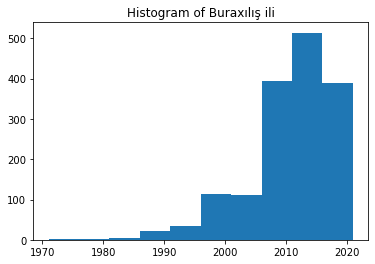

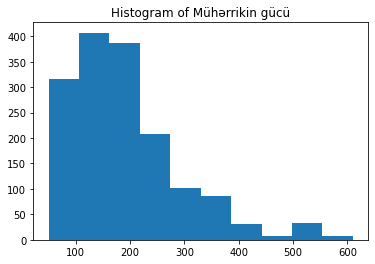

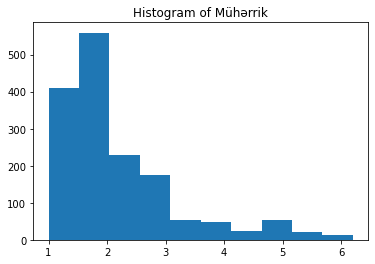

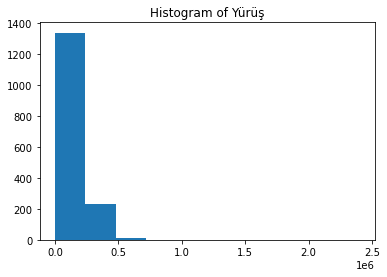

In [53]:
for i in numerical:
    plt.hist(data[i])
    plt.title(f'Histogram of {i}')
    plt.show()

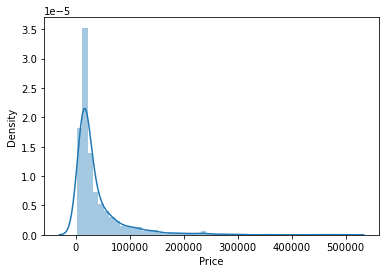

In [54]:
#Price : Target Variable
sns.distplot(data['Price'])
plt.show()

In [55]:
# Inference
# Mean and median of price are significantly different.
# Large standard deviation indicates that there is considerable variance in the prices of the automobiles.
# Price values are right-skewed, most cars are priced at the lower end (9000) of the price range.

In [56]:
data.corr()

,Buraxılış ili,Mühərrik,Mühərrikin gücü,Yürüş,Price
Buraxılış ili,1.000000,0.065939,0.322686,-0.585521,0.477297
Mühərrik,0.065939,1.000000,0.836189,-0.062203,0.499409
Mühərrikin gücü,0.322686,0.836189,1.000000,-0.229733,0.683250
Yürüş,-0.585521,-0.062203,-0.229733,1.000000,-0.391659
Price,0.477297,0.499409,0.683250,-0.391659,1.000000


In [57]:
#Asserting linearity assumption

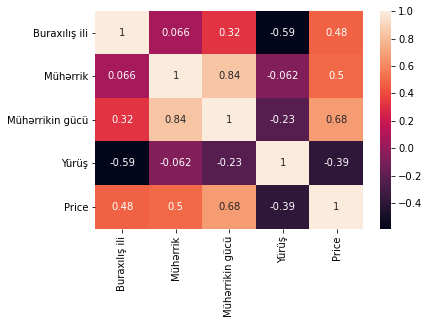

In [58]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [59]:
#Independent variables have a linear relationship with the predictor variable.

In [60]:
#Marka

In [61]:
data['Marka'].unique()

array(['Lexus', 'Hyundai', 'LADA (VAZ)', 'BMW', 'Land Rover', 'Nissan',
       'Iran Khodro', 'Mercedes', 'Toyota', 'Chevrolet', 'Volkswagen',
       'Opel', 'Kia', 'Volvo', 'Jeep', 'Ravon', 'Khazar', 'GAC', 'Honda',
       'Ford', 'Tofas', 'Mazda', 'Subaru', 'Audi', 'Ssang Yong', 'Suzuki',
       'Porsche', 'Renault', 'Mitsubishi', 'Infiniti', 'Mercedes-Maybach',
       'Hummer', 'MG', 'Daewoo', 'Aston Martin', 'Jaguar', 'Mini', 'Baic',
       'UAZ', 'Haval', 'Skoda', 'Geely', 'GAZ', 'Maserati', 'Peugeot',
       'SEAT', 'FAW', 'Chery', 'Changan', 'Fiat', 'Chrysler', 'Cadillac',
       'Saipa'], dtype=object)

In [62]:
data['Marka'] = data['Marka'].replace('Mercedes-Maybach', 'Mercedes')

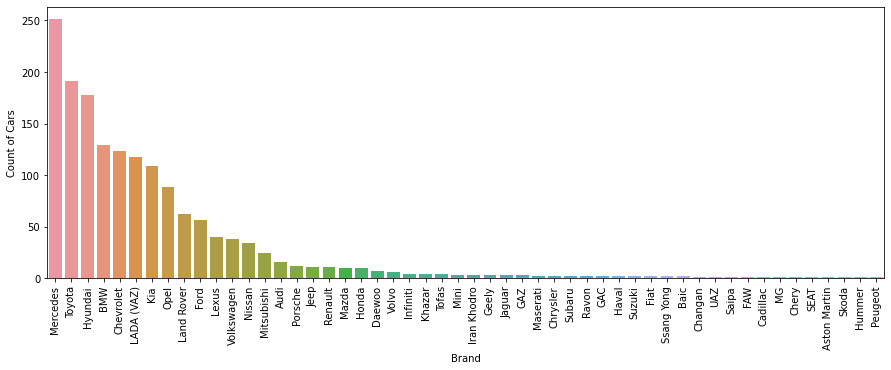

<Figure size 432x288 with 0 Axes>

In [63]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(data['Marka'], order=pd.value_counts(data['Marka']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [64]:
data.Marka.describe()

count         1586
unique          52
top       Mercedes
freq           251
Name: Marka, dtype: object

In [65]:
# Inference
#Mercedes has the most no of models.

In [66]:
# Let's see average car price of each company.

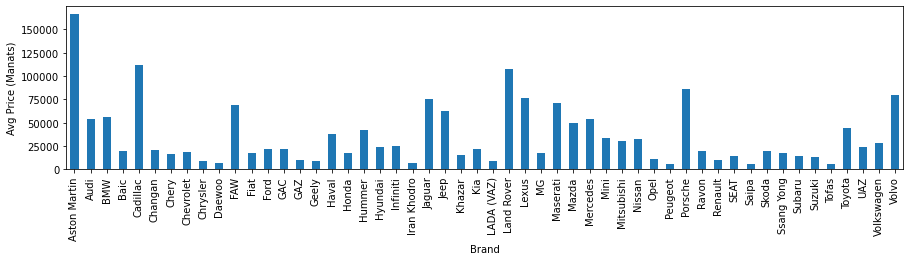

In [67]:
df_comp_avg_price = data[['Marka','Price']].groupby("Marka", as_index = False).mean().rename(columns={'Price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'Marka', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Manats)")
plt.xticks(rotation = 90)
plt.show()

In [68]:
#df_comp_avg_price

In [69]:
data = data.merge(df_comp_avg_price, on = 'Marka')

In [70]:
data['brand_category'] = data['brand_avg_price'].apply(lambda x : "Budget" if x < 30000 
                                                       else ("Mid_Range" if 30000 <= x < 100000
                                                             else "Luxury"))

In [71]:
data['brand_category'].value_counts().to_frame(name='brand_category Count')

,brand_category Count
Budget,785
Mid_Range,737
Luxury,64


In [72]:
# Inference:
# Brands can be categorised as Luxury, Mid Ranged, Budget based on their average price.

In [73]:
#Fuel Type

In [74]:
# Let's see how price varies with  Fuel Type

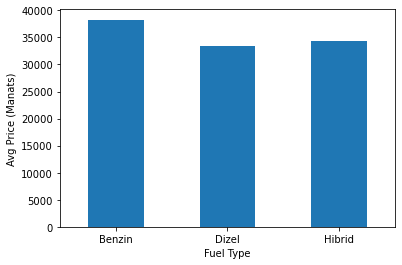

In [75]:
df_fuel_avg_price = data[['Yanacaq növü','Price']].groupby("Yanacaq növü", as_index = False).mean().rename(columns={'Price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'Yanacaq növü', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Manats)")
plt.xticks(rotation = 0)
plt.show()

In [76]:
df_fuel_avg_price.sort_values('fuel_avg_price', ascending=False)

,Yanacaq növü,fuel_avg_price
0,Benzin,38269.966095
2,Hibrid,34283.739655
1,Dizel,33398.333333


In [77]:
df_fuel_max_price = data[['Yanacaq növü','Price']].groupby("Yanacaq növü", as_index = False).max().rename(columns={'Price':'fuel_max_price'})

In [78]:
df_fuel_max_price.sort_values('fuel_max_price', ascending=False)

,Yanacaq növü,fuel_max_price
0,Benzin,501500.0
1,Dizel,249560.0
2,Hibrid,190400.0


In [79]:
#Aspiration

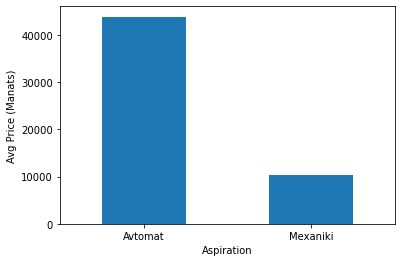

In [80]:
df_aspir_avg_price = data[['Sürətlər qutusu','Price']].groupby("Sürətlər qutusu", as_index = False).mean().rename(columns={'Price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'Sürətlər qutusu', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Manats)")
plt.xticks(rotation = 0)
plt.show()

In [81]:
data['Sürətlər qutusu'].describe()

count        1586
unique          2
top       Avtomat
freq         1286
Name: Sürətlər qutusu, dtype: object

In [82]:
#Car Body

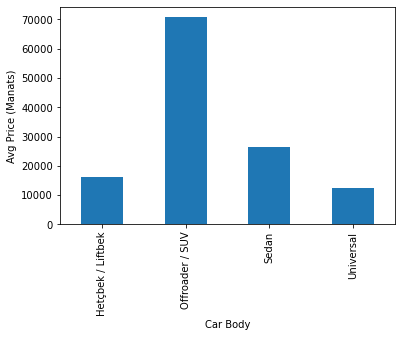

In [83]:
df_body_avg_price = data[['Ban növü','Price']].groupby("Ban növü", as_index = False).mean().rename(columns={'Price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'Ban növü', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Manats)")
plt.xticks(rotation = 90)
plt.show() 

In [84]:
data['Ban növü'].describe()

count      1586
unique        4
top       Sedan
freq        848
Name: Ban növü, dtype: object

In [85]:
df_body_avg_price.sort_values('carbody_avg_price', ascending=False)

,Ban növü,carbody_avg_price
1,Offroader / SUV,70760.494624
2,Sedan,26527.817807
0,Hetçbek / Liftbek,16113.873913
3,Universal,12485.606061


In [86]:
df_body_max_price = data[['Ban növü','Price']].groupby("Ban növü", as_index = False).max().rename(columns={'Price':'carbody_max_price'})
df_body_max_price.sort_values('carbody_max_price', ascending=False)

,Ban növü,carbody_max_price
2,Sedan,501500.0
1,Offroader / SUV,464950.0
0,Hetçbek / Liftbek,166600.0
3,Universal,46750.0


In [87]:
#Transmitter

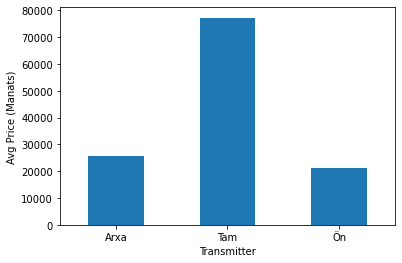

In [88]:
df_transmitter_avg_price = data[['Ötürücü','Price']].groupby("Ötürücü", as_index = False).mean().rename(columns={'Price':'transmitter_avg_price'})
plt1 = df_transmitter_avg_price.plot(x = 'Ötürücü', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Transmitter")
plt1.set_ylabel("Avg Price (Manats)")
plt.xticks(rotation = 0)
plt.show()

In [89]:
#Engine power

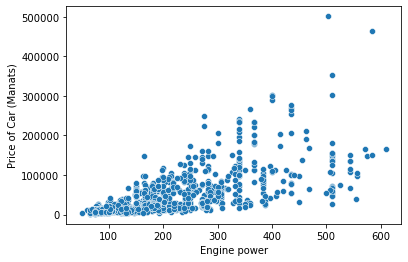

In [90]:
plt1 = sns.scatterplot(x = 'Mühərrikin gücü', y = 'Price', data = data)
plt1.set_xlabel('Engine power')
plt1.set_ylabel('Price of Car (Manats)')
plt.show()

In [91]:
# Most cars have engine power between 100 and 300.
# Price has a slight positive correlation with engine power.

In [92]:
#Engine

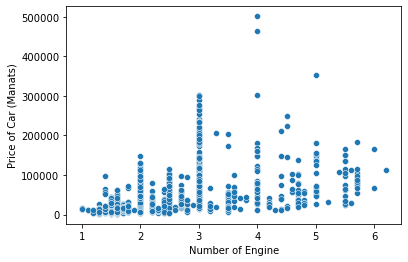

In [93]:
plt1 = sns.scatterplot(x = 'Mühərrik', y = 'Price', data = data)
plt1.set_xlabel('Number of Engine')
plt1.set_ylabel('Price of Car (Manats)')
plt.show()

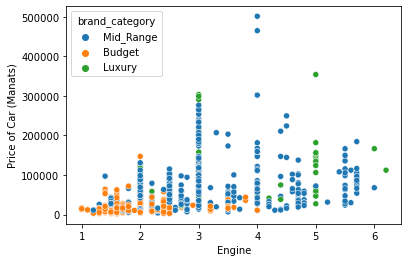

In [94]:
plt1 = sns.scatterplot(x = 'Mühərrik', y = 'Price', hue = 'brand_category', data = data)
plt1.set_xlabel('Engine')
plt1.set_ylabel('Price of Car (Manats)')
plt.show()

In [95]:
#Cars with luxary category have more engine in general.

In [96]:
# Let's see how price varies with kilometers.

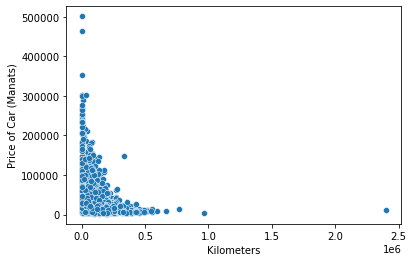

In [97]:
plt1 = sns.scatterplot(x = 'Yürüş', y = 'Price', data = data)
plt1.set_xlabel('Kilometers')
plt1.set_ylabel('Price of Car (Manats)')
plt.show()

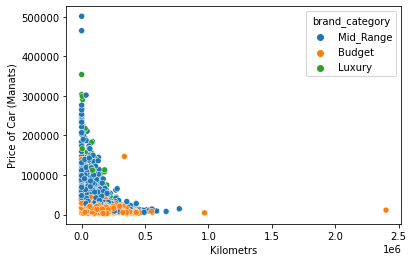

In [98]:
plt1 = sns.scatterplot(x = 'Yürüş', y = 'Price', hue = 'brand_category', data = data)
plt1.set_xlabel('Kilometrs')
plt1.set_ylabel('Price of Car (Manats)')
plt.show()

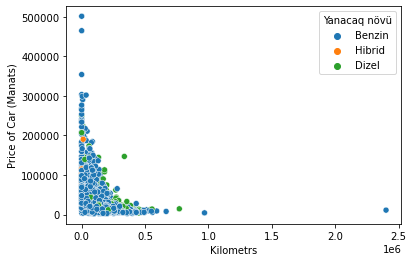

In [99]:
plt1 = sns.scatterplot(x = 'Yürüş', y = 'Price', hue = 'Yanacaq növü', data = data)
plt1.set_xlabel('Kilometrs')
plt1.set_ylabel('Price of Car (Manats)')
plt.show()

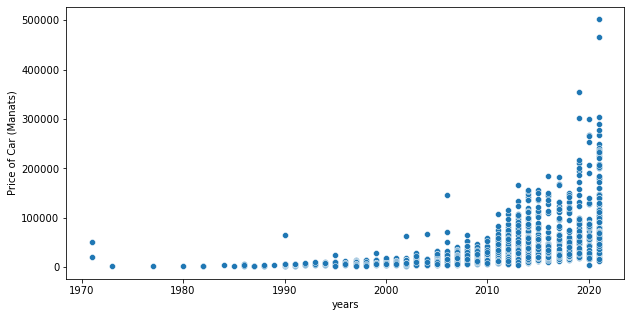

<Figure size 720x720 with 0 Axes>

In [100]:
plt.figure(figsize=(10,5))
plt1 = sns.scatterplot(x = 'Buraxılış ili', y = 'Price', data = data)
plt.figure(figsize=(10,10))
plt1.set_xlabel('years')
plt1.set_ylabel('Price of Car (Manats)')
plt.show()

In [101]:
#Newest cars have highest prices.

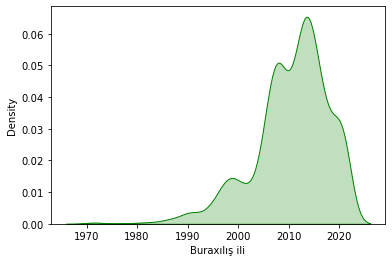

In [102]:
ax = sns.kdeplot(data["Buraxılış ili"], shade=True, color="g")

In [103]:
categorical = ['Ban növü','Yanacaq növü','Sürətlər qutusu', 'Ötürücü', 'Yeni','brand_category']
numerical = ['Buraxılış ili','Mühərrik', 'Mühərrikin gücü', 'Yürüş']

In [104]:
auto = pd.DataFrame()

In [105]:
for i in categorical:
    dummies = pd.get_dummies(data[i], drop_first=True)
    auto = pd.concat([auto, dummies], axis = 1)

In [106]:
auto[numerical+['Price']]= data[numerical+['Price']]

In [107]:
y_train = auto.pop('Price')
X_train = auto

In [108]:
X_train.head()

,Offroader / SUV,Sedan,Universal,Dizel,Hibrid,Mexaniki,Tam,Ön,Xeyr,Luxury,Mid_Range,Buraxılış ili,Mühərrik,Mühərrikin gücü,Yürüş
0,1,0,0,0,0,0,1,0,1,0,1,2016,5.7,367.0,84525.0
1,1,0,0,0,0,0,1,0,1,0,1,2008,5.7,383.0,225000.0
2,1,0,0,0,0,0,1,0,1,0,1,2013,5.7,383.0,83000.0
3,1,0,0,0,0,0,0,1,1,0,1,2021,2.0,150.0,2500.0
4,1,0,0,0,0,0,0,1,0,0,1,2021,2.0,150.0,0.0


In [109]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [110]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [111]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Offroader / SUV', True, 1),
 ('Sedan', True, 1),
 ('Universal', True, 1),
 ('Dizel', True, 1),
 ('Hibrid', True, 1),
 ('Mexaniki', True, 1),
 ('Tam', True, 1),
 ('Ön', True, 1),
 ('Xeyr', True, 1),
 ('Luxury', True, 1),
 ('Mid_Range', True, 1),
 ('Buraxılış ili', True, 1),
 ('Mühərrik', True, 1),
 ('Mühərrikin gücü', True, 1),
 ('Yürüş', True, 1)]

In [112]:
col = X_train.columns[rfe.support_]

In [113]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [114]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [115]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [116]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     228.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:47:10   Log-Likelihood:                -18394.
No. Observations:                1586   AIC:                         3.682e+04
Df Residuals:                    1570   BIC:                         3.691e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.586e+06   2.84e+05     